In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/DSL/EDA2_Education/data/Elementary_students.csv"  # 데이터 파일 경로를 설정하세요
df_reg = pd.read_csv(file_path, encoding='utf-8-sig')
file_path = "/content/drive/MyDrive/Colab Notebooks/DSL/EDA2_Education/data/출생아수.csv"
df_bir = pd.read_csv(file_path, encoding='utf-8-sig')

In [ ]:
#전교생 수 회귀 & 출생수 시각화하여 비교
df_reg_all = df_reg.iloc[-1:]
df_reg_all= df_reg_all.drop(columns=["학제유형명","개방ID","학교명","R값","p-value","2030 예측값"])
df_reg_all['시도명'] = '전국_reg'
df_reg_all = df_reg_all.set_index("시도명")

In [ ]:
#회귀분석으로 2024~2030년 전교생 수 예측
import numpy as np
from sklearn.linear_model import LinearRegression

df_reg_all.columns = df_reg_all.columns.astype(int)
# X, y 데이터 준비
years = np.array(list(range(2009, 2024))).reshape(-1, 1)  # 2009~2023년 (학습 데이터)
y_values = df_reg_all.loc["전국_reg", 2009:2023].values.reshape(-1, 1)  # 종속 변수

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(years, y_values)

# 2024~2030년 예측
future_years = np.array(list(range(2024, 2031))).reshape(-1, 1)
predicted_values = model.predict(future_years).flatten()

# 예측값을 DataFrame에 추가
for i, year in enumerate(range(2024, 2031)):
    df_reg_all[year] = predicted_values[i]

In [ ]:
add =[]
for i in range(1,23):
  s=0
  for j in range(6):
    s+=int(df_bir.iloc[0,i+j])
  add.append(s)

In [ ]:
df_reg_all.loc["전국_bir"]=add

In [ ]:
df_reg_all

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
시도명,,,,,,,,,,,,,,,,,,,,,
전국_reg,3445343,3274312,3110552,2932419,2771949,2717509,2705546,2664881,2667577,2706564,...,2667376,2657386,2593420,2.452175e+06,2.405782e+06,2.359389e+06,2.312996e+06,2.266603e+06,2.220210e+06,2.173817e+06
전국_bir,3634590,3454232,3289596,3107635,2919305,2856193,2825174,2774987,2768200,2800758,...,2742725,2736296,2672368,2.558874e+06,2.401146e+06,2.267367e+06,2.104269e+06,1.926411e+06,1.769354e+06,1.641611e+06


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44734 (\N{HANGUL SYLLABLE GGEOGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


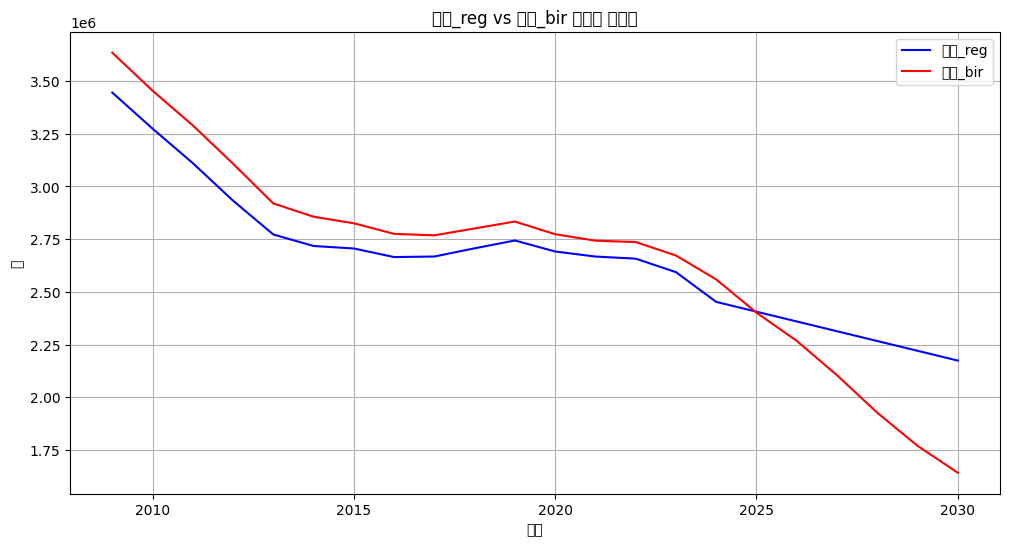

In [ ]:
#시각화
import matplotlib.pyplot as plt

# 데이터 준비 (행과 열을 전환하여 시각화에 적합한 형태로 변환)
df_plot = df_reg_all.T  # 년도를 x축으로 사용하기 위해 Transpose

# 그래프 설정
plt.figure(figsize=(12, 6))

# 색상을 명시적으로 지정
colors = {
    "전국_reg": "blue",   # 파란색
    "전국_bir": "red"     # 빨간색
}

# 각각의 행을 다른 색으로 표현
for idx, row in df_plot.items():
    plt.plot(df_plot.index, row, label=idx, color=colors.get(idx, "gray"))  # 기본색은 회색

# 그래프 스타일링
plt.xlabel("년도")
plt.ylabel("값")
plt.title("전국_reg vs 전국_bir 꺾은선 그래프")
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

In [ ]:
#다변량 회귀로 전국 전교생 수 예측

# DataFrame 생성 (index를 "전국_reg", "전국_bir"로 설정)
df_reg_mul = df_reg_all

# 2009~2023년 데이터를 학습 데이터로 사용
X_train = df_reg_mul.loc["전국_bir", 2009:2023].values.reshape(-1, 1)  # 출생아 수 (독립 변수)
y_train = df_reg_mul.loc["전국_reg", 2009:2023].values.reshape(-1, 1)  # 전교생 수 (종속 변수)

# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 2024~2030년의 출생아 수 데이터를 사용하여 전교생 수 예측
X_future = df_reg_mul.loc["전국_bir", 2024:2030].values.reshape(-1, 1)
y_pred = model.predict(X_future).flatten()

# 예측값을 DataFrame에 반영
df_reg_mul.loc["전국_reg", 2024:2030] = y_pred

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44734 (\N{HANGUL SYLLABLE GGEOGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


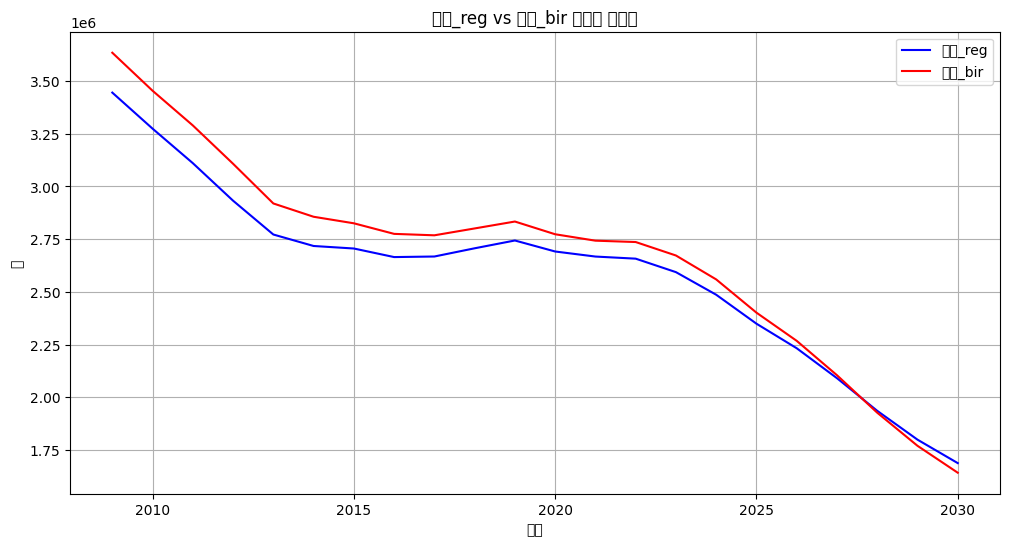

In [ ]:
#시각화
import matplotlib.pyplot as plt

# 데이터 준비 (행과 열을 전환하여 시각화에 적합한 형태로 변환)
df_plot = df_reg_mul.T  # 년도를 x축으로 사용하기 위해 Transpose

# 그래프 설정
plt.figure(figsize=(12, 6))

# 색상을 명시적으로 지정
colors = {
    "전국_reg": "blue",   # 파란색
    "전국_bir": "red"     # 빨간색
}

# 각각의 행을 다른 색으로 표현
for idx, row in df_plot.items():
    plt.plot(df_plot.index, row, label=idx, color=colors.get(idx, "gray"))  # 기본색은 회색

# 그래프 스타일링
plt.xlabel("년도")
plt.ylabel("값")
plt.title("전국_reg vs 전국_bir 꺾은선 그래프")
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

In [ ]:
df_reg.head()

,시도명,학제유형명,개방ID,학교명,2009,2010,2011,2012,2013,2014,...,2017,2018,2019,2020,2021,2022,2023,R값,p-value,2030 예측값
0,강원,초등학교,1.008023e+09,섬강초등학교,0,0,0,0,0,0,...,0,0,956,1568,1242,1299,1360,0.817617,1.966960e-04,2061.533333
1,강원,초등학교,1.059737e+09,화동초등학교,58,54,50,44,38,32,...,44,44,41,35,31,24,18,-0.813327,2.262710e-04,11.933333
2,강원,초등학교,1.110422e+09,정라초등학교,1269,1257,1213,1164,1078,1024,...,840,759,709,678,630,567,512,-0.997449,2.720000e-16,101.100000
3,강원,초등학교,1.112042e+09,성림초등학교,1292,1314,1311,1349,1299,1267,...,1146,1115,1141,1152,1029,942,892,-0.929669,5.320000e-07,770.266667
4,강원,초등학교,1.128985e+09,속사초등학교,20,21,23,22,25,24,...,34,35,49,45,50,48,37,0.870908,2.380000e-05,62.816667


In [ ]:
df_reg_ele= df_reg.drop(columns=["R값","p-value","2030 예측값"])

In [ ]:
df_reg_ele.head()

,시도명,학제유형명,개방ID,학교명,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,강원,초등학교,1.008023e+09,섬강초등학교,0,0,0,0,0,0,0,0,0,0,956,1568,1242,1299,1360
1,강원,초등학교,1.059737e+09,화동초등학교,58,54,50,44,38,32,34,43,44,44,41,35,31,24,18
2,강원,초등학교,1.110422e+09,정라초등학교,1269,1257,1213,1164,1078,1024,959,898,840,759,709,678,630,567,512
3,강원,초등학교,1.112042e+09,성림초등학교,1292,1314,1311,1349,1299,1267,1202,1151,1146,1115,1141,1152,1029,942,892
4,강원,초등학교,1.128985e+09,속사초등학교,20,21,23,22,25,24,21,27,34,35,49,45,50,48,37


In [ ]:
X_train

array([[3634590.],
       [3454232.],
       [3289596.],
       [3107635.],
       [2919305.],
       [2856193.],
       [2825174.],
       [2774987.],
       [2768200.],
       [2800758.],
       [2833549.],
       [2773182.],
       [2742725.],
       [2736296.],
       [2672368.]])

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


# 1. 출생아 수 데이터 변환 (X 데이터)
df_reg_bir = df_reg_all.loc["전국_bir", "2009":"2030"].T.reset_index()
df_reg_bir.columns = ["연도", "출생아수"]
df_reg_bir["연도"] = df_reg_bir["연도"].astype(int)

# 2. 2024~2030년 데이터 준비
future_years = [str(year) for year in range(2024, 2031)]
df_future = df_reg_bir[df_reg_bir["연도"] >= 2024]

# 3. 기존 df_reg_ele에 2024~2030년 컬럼 추가
for year in future_years:
    df_reg_ele[str(year)] = np.nan

# 4. 학교별 단순 회귀 분석 및 예측
predictions = []
for i, row in df_reg_ele.iterrows():
    school_name = row["학교명"]
    row = row.rename(index=str)
    # 학교별 X (출생아 수)와 Y (전교생 수) 추출
    y_train = row.loc["2009":"2023"].values.astype(float)
    X_train = df_reg_bir[df_reg_bir["연도"] <= 2023]["출생아수"].values.reshape(-1, 1)

    # Y 값이 0인 경우 제외
    valid_idx = y_train > 0
    X_train = X_train[valid_idx]
    y_train = y_train[valid_idx]

    # 데이터가 부족한 경우 평균값으로 예측
    if len(y_train) < 3:
        avg_y = np.mean(y_train) if len(y_train) > 0 else 0
        y_pred = np.full(len(df_future), avg_y)
    else:
        # OLS 회귀 모델 학습 (p-value 계산을 위해 statsmodels 사용)
        X_train_sm = sm.add_constant(X_train)  # 상수항 추가
        model_sm = sm.OLS(y_train, X_train_sm).fit()
        p_value = model_sm.pvalues[1]  # 출생아수에 대한 p-value
        r_squared = model_sm.rsquared  # 결정계수 (R^2)

        # sklearn을 이용한 단순 회귀 예측
        model = LinearRegression()
        model.fit(X_train, y_train)

        # 2024~2030년 예측
        X_future = df_future["출생아수"].values.reshape(-1, 1)
        y_pred = model.predict(X_future)

    # 예측값을 기존 df_reg_ele에 직접 추가
    for j, year in enumerate(future_years):
        df_reg_ele.at[i, year] = y_pred[j]

    # p-value와 R^2 값 추가
    df_reg_ele.at[i, "p_value"] = p_value
    df_reg_ele.at[i, "R_squared"] = r_squared

NameError: name 'df_reg_all' is not defined

In [ ]:
df_reg_ele.head()

,시도명,학제유형명,개방ID,학교명,2009,2010,2011,2012,2013,2014,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,강원,초등학교,1.008023e+09,섬강초등학교,0,0,0,0,0,0,...,1242,1299,1360,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000
1,강원,초등학교,1.059737e+09,화동초등학교,58,54,50,44,38,32,...,31,24,18,27.820033,23.128155,19.148678,14.297060,9.006382,4.334463,0.534537
2,강원,초등학교,1.110422e+09,정라초등학교,1269,1257,1213,1164,1078,1024,...,630,567,512,614.671867,496.846904,396.912169,275.075743,142.213395,24.889678,-70.536082
3,강원,초등학교,1.112042e+09,성림초등학교,1292,1314,1311,1349,1299,1267,...,1029,942,892,1045.074841,992.752841,948.375274,894.271922,835.272339,783.172925,740.797638
4,강원,초등학교,1.128985e+09,속사초등학교,20,21,23,22,25,24,...,50,48,37,41.477663,45.312815,48.565648,52.531371,56.855984,60.674820,63.780888


In [ ]:
print(df_reg_ele["2030"].sum())

3243248.099864712


,시도명,학제유형명,개방ID,학교명,2009,2010,2011,2012,2013,2014,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
2,강원,초등학교,1.110422e+09,정라초등학교,1269,1257,1213,1164,1078,1024,...,630,567,512,614.671867,496.846904,396.912169,275.075743,142.213395,24.889678,-70.536082
6,강원,초등학교,1.154525e+09,대진초등학교,99,90,79,64,57,53,...,40,44,42,23.658722,12.272145,2.614474,-9.159770,-21.999558,-33.337695,-42.559619
9,강원,초등학교,1.202087e+09,남춘천초등학교,875,814,711,646,580,535,...,408,558,608,375.957253,302.994084,241.109448,165.662177,83.387100,10.734327,-48.358124
12,강원,초등학교,1.218364e+09,유촌초등학교,77,71,74,71,68,57,...,29,32,35,30.657104,22.584347,15.737337,7.389735,-1.713305,-9.751719,-16.289798
14,강원,초등학교,1.261953e+09,광정초등학교,56,51,46,54,55,49,...,28,19,25,23.936064,18.585106,14.046622,8.513485,2.479611,-2.848584,-7.182295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,충북,초등학교,9.746003e+09,덕성초등학교,1112,1063,979,892,805,756,...,415,387,387,378.386583,255.881158,151.976631,25.300392,-112.839760,-234.824027,-334.040466
6283,충북,초등학교,9.767947e+09,삼성초등학교,403,345,307,294,277,258,...,154,149,139,142.460961,103.853083,71.107323,31.185002,-12.350197,-50.793831,-82.062130
6285,충북,초등학교,9.819335e+09,옥산초등학교,777,726,665,607,556,530,...,340,338,306,365.199367,299.914700,244.542684,177.035339,103.418731,38.411796,-14.461880
6286,충북,초등학교,9.872797e+09,분평초등학교,1054,986,915,823,729,698,...,481,466,430,424.187384,323.416587,237.946560,133.744925,20.113279,-80.228823,-161.842512
